# Data Analysis and Data Science
## Be curious about the data 

By: Thomas Perreault
<br>For: BIM6065-65

<hr style="border:1px solid black"> </hr>



**Student Name**: Thomas Perreault 

Complete the following exercises and submit your Notebook in a HTML format on StudiUM. You have until July 3rd, noon to hand-in your Notebook.

## Python Libraries

Import the Pandas, and Seaborn

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Get the data [8 pts]

Download the <code>breast_cancer_metametric.tsv</code> dataset from StudiUM and upload it to the Jupyter IRIC server. Using <code>pandas</code>, read the file and save its content into a variable as a dataframe.

In [3]:
## Define variable with file name
fn = "breast_cancer_metametric.tsv"

In [4]:
## Read ans save data into variable as a dataframe
data = pd.read_csv("breast_cancer_metametric.tsv", header=0,sep="\t")
data.head

<bound method NDFrame.head of       CHEMOTHERAPY  HORMONE_THERAPY  RADIO_THERAPY  BREAST_SURGERY  \
0              1.0              1.0            1.0             0.0   
1              1.0              1.0            1.0             0.0   
2              1.0              1.0            1.0             0.0   
3              0.0              1.0            0.0             0.0   
4              0.0              1.0            1.0             1.0   
...            ...              ...            ...             ...   
1099           0.0              1.0            1.0             1.0   
1100           0.0              0.0            0.0             0.0   
1101           0.0              1.0            1.0             0.0   
1102           0.0              1.0            1.0             1.0   
1103           0.0              0.0            1.0             1.0   

      CELLULARITY  VITAL_STATUS  GRADE  COHORT  MUTATION_COUNT    NPI  \
0             2.0           0.0    3.0     1.0          

## Explore the data [12 pts]

Using various <code>pandas</code> functions, answer the following questions. **Make sure you answers are explicitely outputed by your code.**

1. How many variables and samples are there in your dataset?

In [5]:
print(len(data.index.values),  " samples a.k.a patients")
print(len(data.columns.values), " variables")

1104  samples a.k.a patients
14  variables


***
2. How many age groups are considered?

In [6]:
print(data.AGE_GROUP.nunique(), " age groups")

6  age groups


***
3. What is the mean overall survival (in month)?

In [7]:
print(data.OS_MONTHS.mean(), " months")

126.10326086947464  months


***
4. What is the highest mutation count?

In [8]:
print(data.MUTATION_COUNT.max(), " mutations")

46.0  mutations


***
5. How large is the smallest tumor?

In [9]:
print(data.TUMOR_SIZE.min(), " cm")

1.0  cm


***
6. What are the grade considered in the dataset?

In [10]:
print("Grades:", data.GRADE.unique() )

Grades: [3. 2. 1.]


***
7. What is the median Nottingham Prognostic Index (NPI)?

In [11]:
print("Median NPI: ",data.NPI.median() )

Median NPI:  4.046


***
8. a) What are the possible values for CHEMOTHERAPY, HORMONE_THERAPY, RADIO_THERAPY, BREAST_SURGERY? <br>b) What do you think these values represent? 

In [12]:
print("CHEMOTHERAPY", data.CHEMOTHERAPY.unique())
print("HORMONE_THERAPY", data.HORMONE_THERAPY.unique())
print("RADIO_THERAPY", data.RADIO_THERAPY.unique())
print("BREAST_SURGERY", data.BREAST_SURGERY.unique())
print()
print("These values represent binary values. 1 represents a yes and 0 represent a no.")
print("It allows to see what treatment the patient got.")

CHEMOTHERAPY [1. 0.]
HORMONE_THERAPY [1. 0.]
RADIO_THERAPY [1. 0.]
BREAST_SURGERY [0. 1.]

These values represent binary values. 1 represents a yes and 0 represent a no.
It allows to see what treatment the patient got.


***
10. How many patients in the dataset have had breast surgery?

In [13]:

print(len(data.BREAST_SURGERY == "1.0"), "patients have had breast surgery")

1104 patients have had breast surgery


## Visualize the data [30 pts pts]

You are first interested in the distribution of the overall survival of the various samples. You hypothesize that the distribution differ from one tumor stage to another.

Design a figure that will help verify your hypothesis. **Make sure your figure is readable and displayed after your code.**

Briefly intepret your figure.

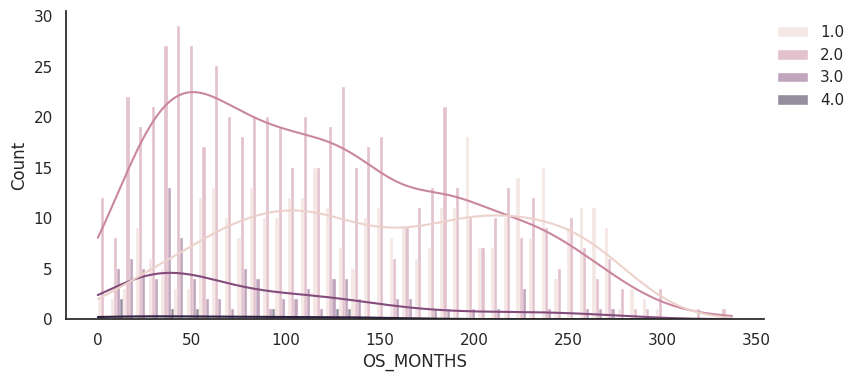

In [14]:
### Figure
p = sns.histplot(data, x="OS_MONTHS", bins=50, hue="TUMOR_STAGE", multiple = "dodge",kde=True)

sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1), title=None, frameon=False)
sns.despine()


In [15]:
### Interpretation
print("The distribution indeed differs from one tumor stage to another.")
print("Stage 1 tumors have a higher overall survival compared to other stages of tumors") 
print("but it's hard to really differentiate the distribution of stage 2 and 3 tumors since the tendancy look similar.")
print("As for stage 4 tumors, there isn't enough data to compare the distribution to other stages")

The distribution indeed differs from one tumor stage to another.
Stage 1 tumors have a higher overall survival compared to other stages of tumors
but it's hard to really differentiate the distribution of stage 2 and 3 tumors since the tendancy look similar.
As for stage 4 tumors, there isn't enough data to compare the distribution to other stages


***
You are now interested in the relationship between the overall survival and the other variables measured. Given your knowledge of the dataset, make an hypothesis that considered the overall survival.

Explore the dataset and generate a least one figure that validate or invalidate your hypothesis. **Make sure your figure is readable and displayed after your code.**

Briefly intepret your figure.

In [16]:
### Hypothesis
print("The NPI of the patient may be an indicator of the overall survival.")

The NPI of the patient may be an indicator of the overall survival.


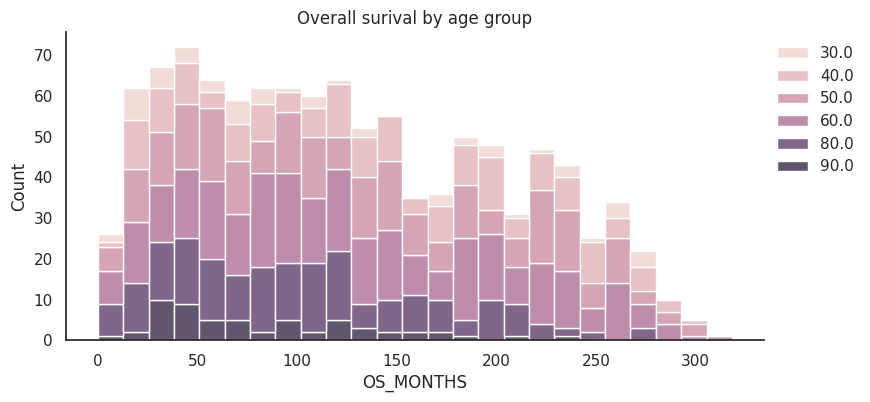

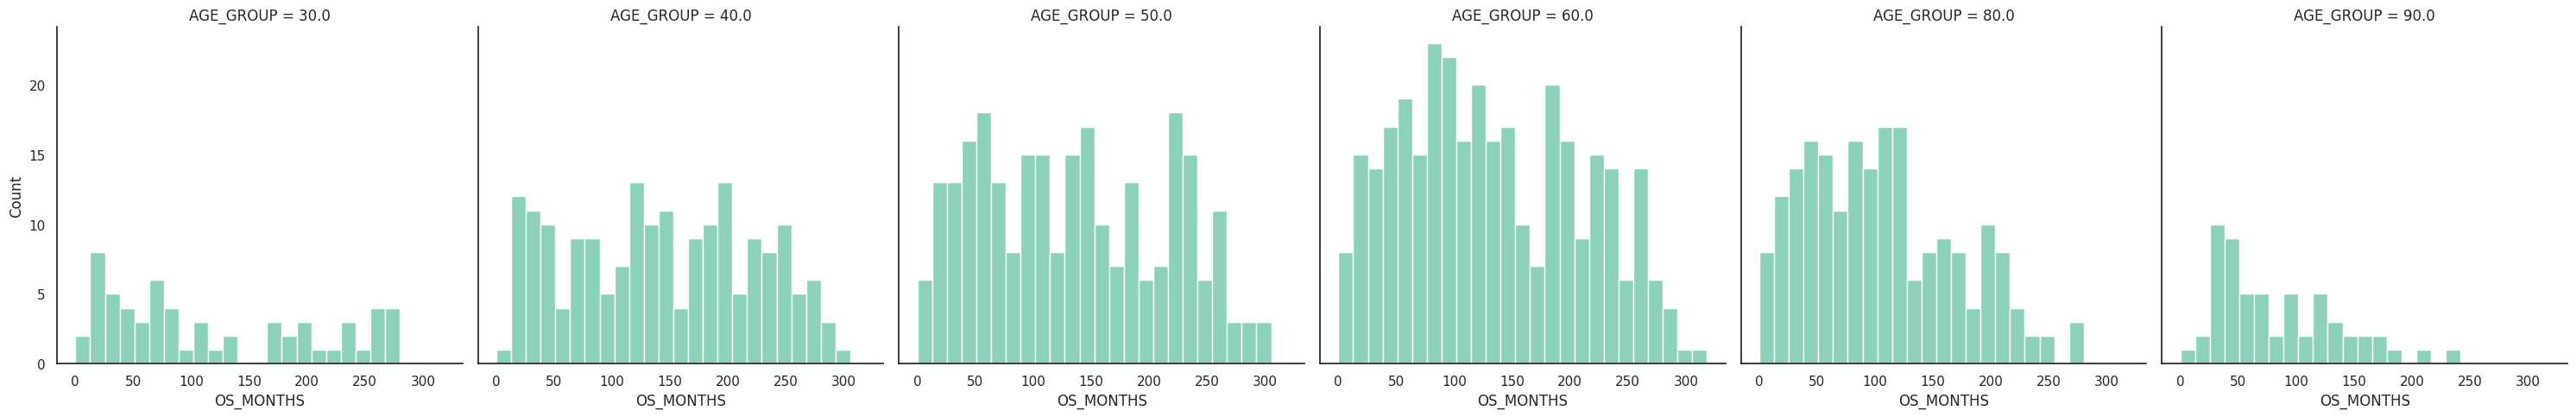

In [23]:
### Figure

#sns.catplot(data=data, x="NPI", y="OS_MONTHS", kind="box")
#sns.despine()
import seaborn as sns

p = sns.histplot(data, x="OS_MONTHS", bins=25, hue="AGE_GROUP", multiple="stack")
p.set_title("Overall surival by age group")

sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1), title=None, frameon=False)
sns.despine()

# =============================== displot() ==============================================
p = sns.displot(data, x="OS_MONTHS", bins=25, col="AGE_GROUP")
sns.despine()

In [19]:
### Interpretation
print("The overall survival seems to be lower in patients from older age groups compared to younger age groups")

The overall survival seems to be lower in patients from older age groups compared to younger age groups
